In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

In [3]:
headers = [i for i in range(30)] 
data = pd.read_csv("train.csv", names = headers)
data_predict = pd.read_csv("test.csv", names = headers)

In [4]:
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5) 

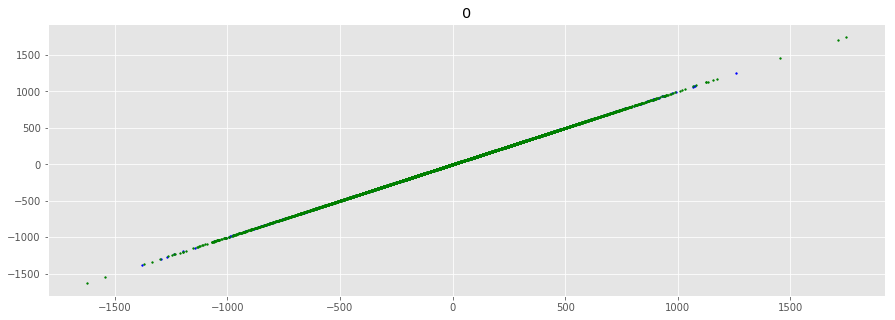

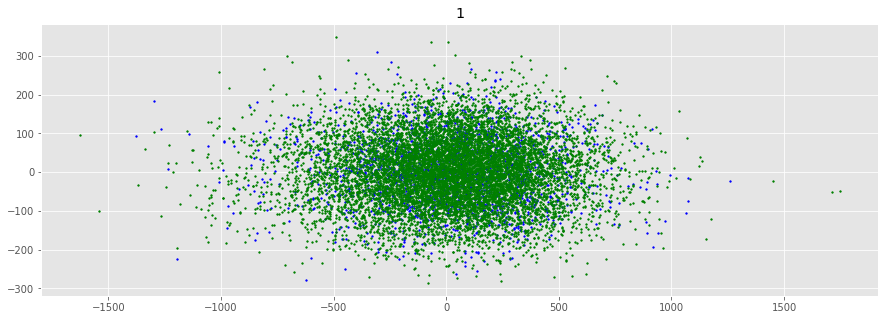

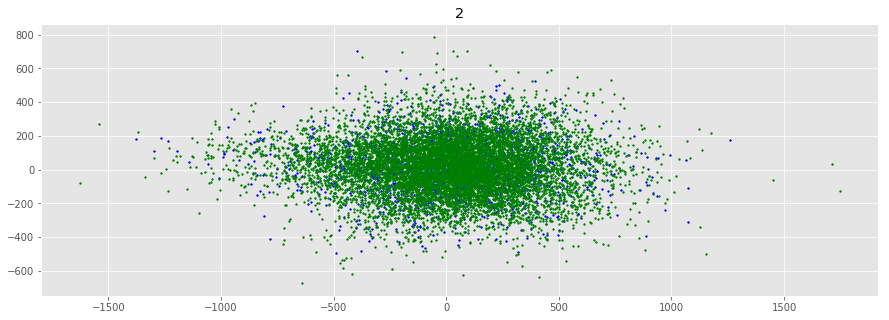

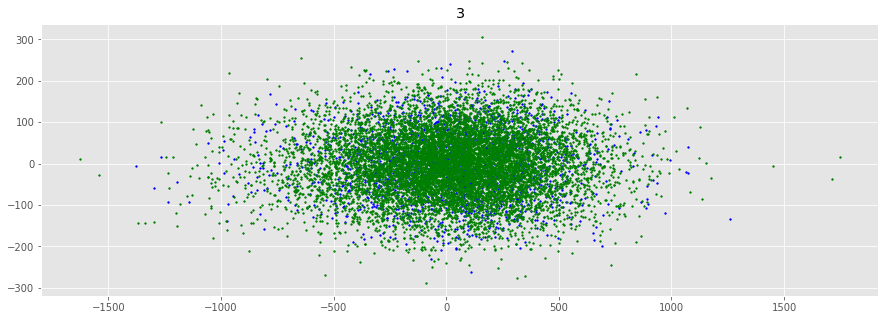

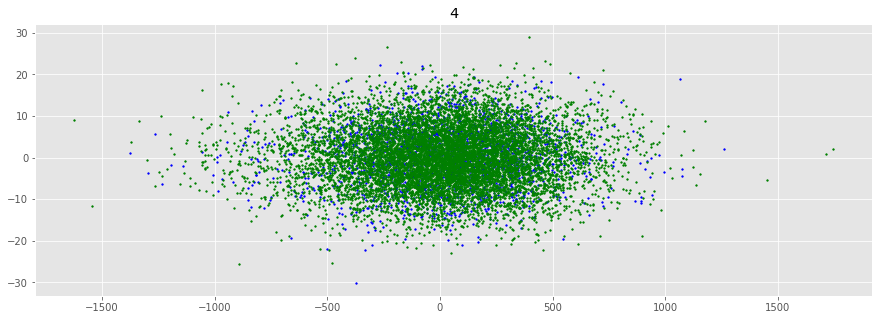

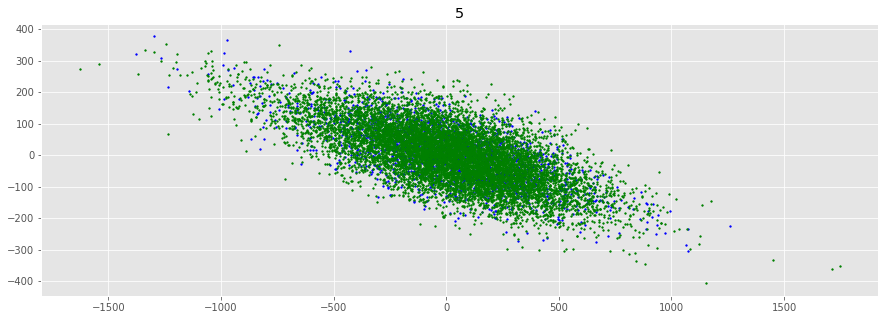

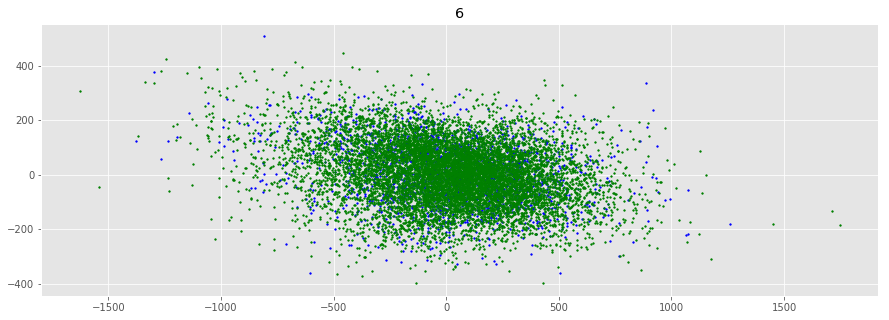

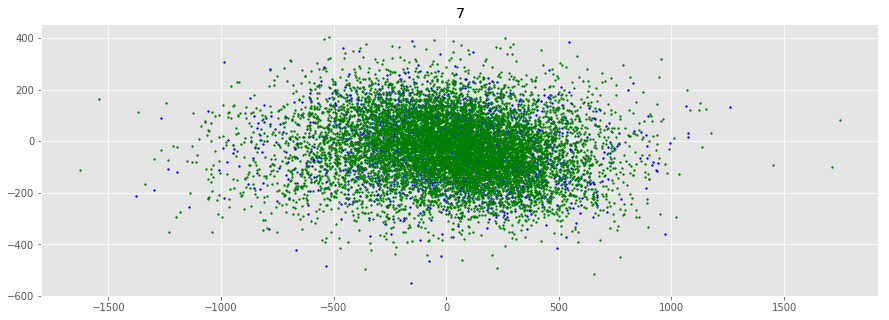

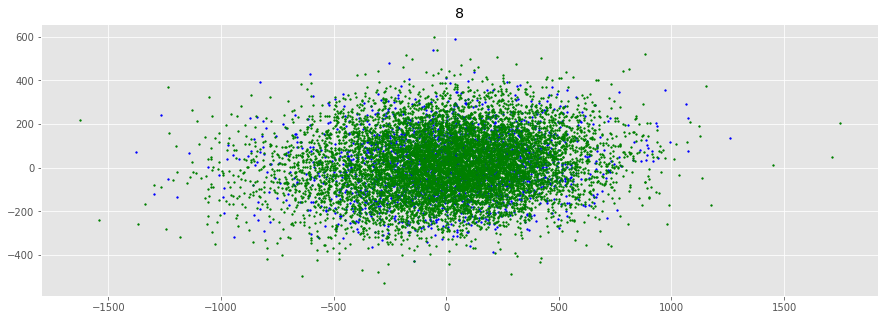

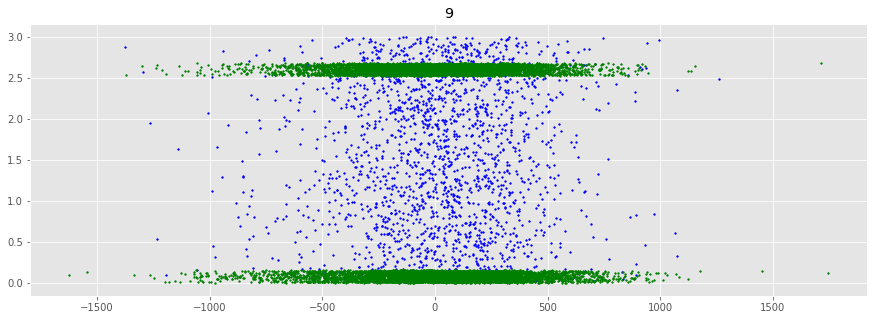

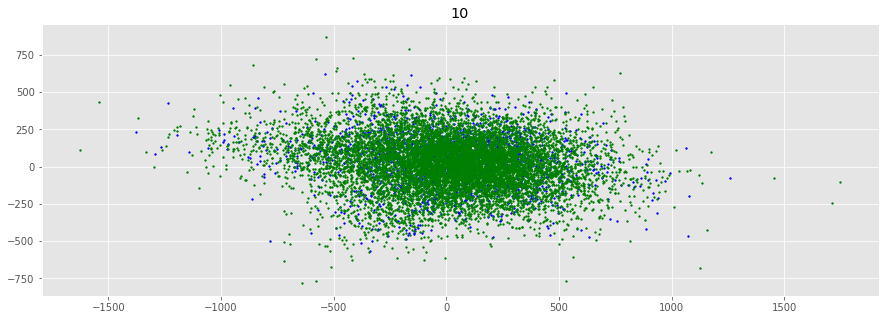

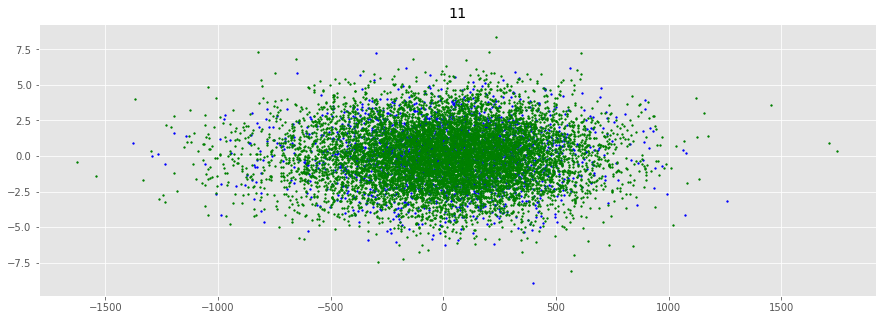

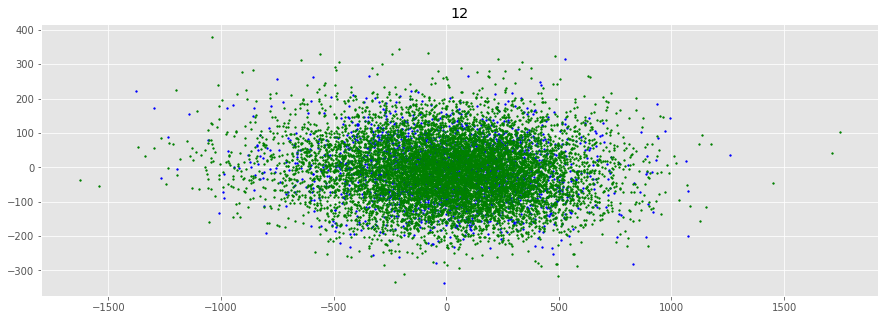

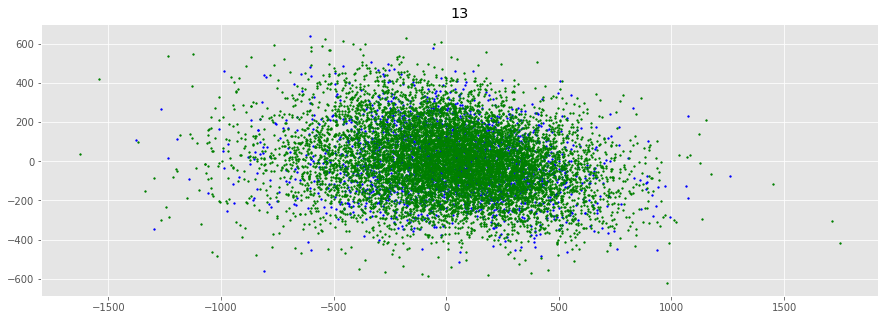

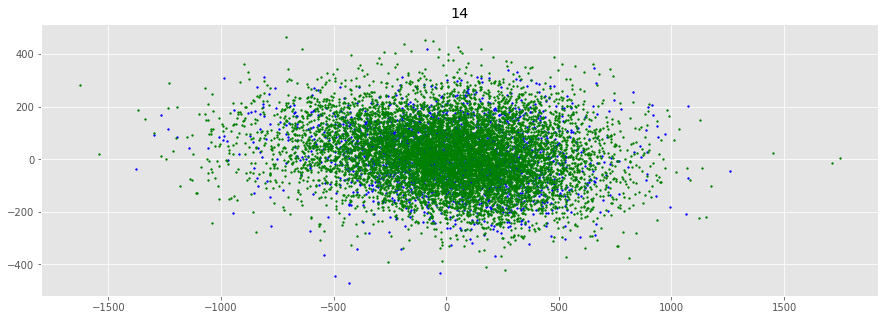

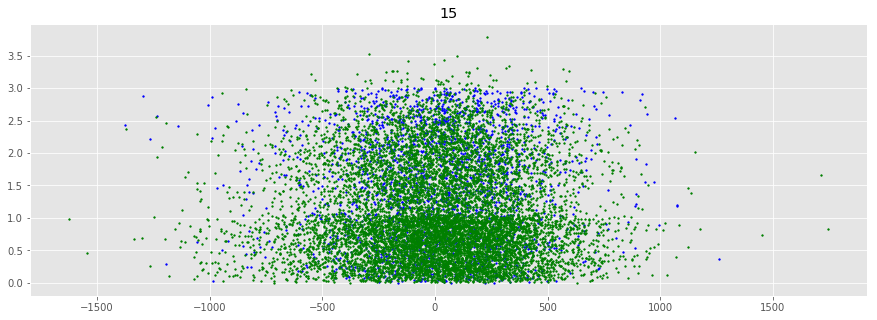

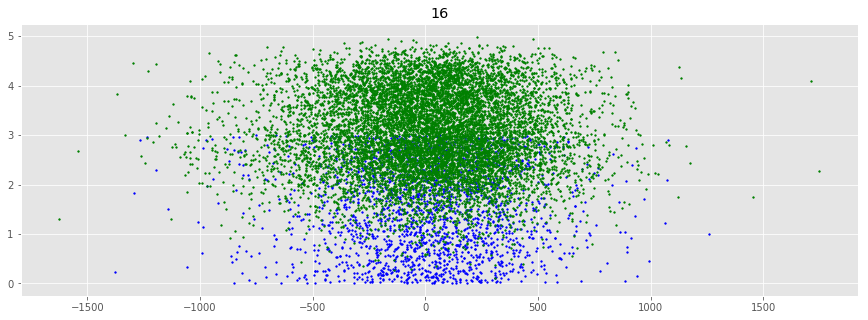

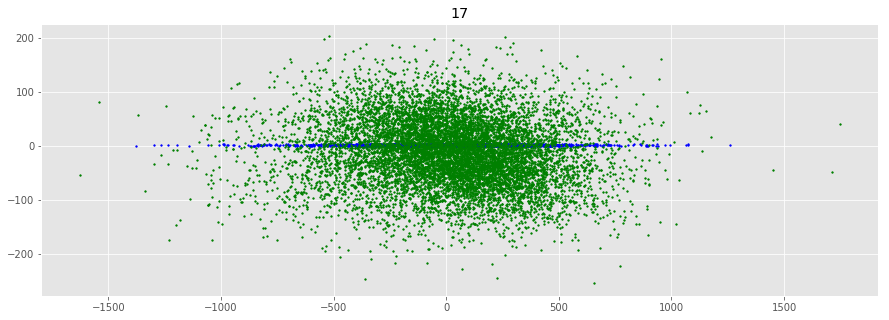

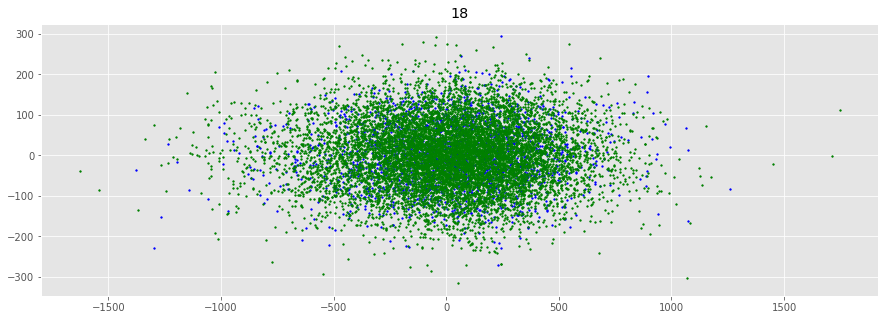

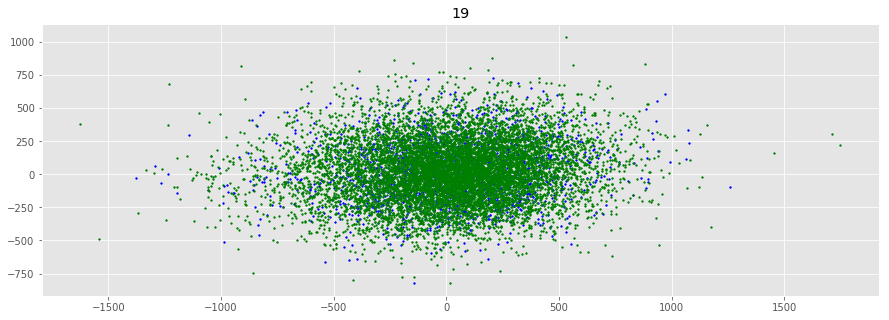

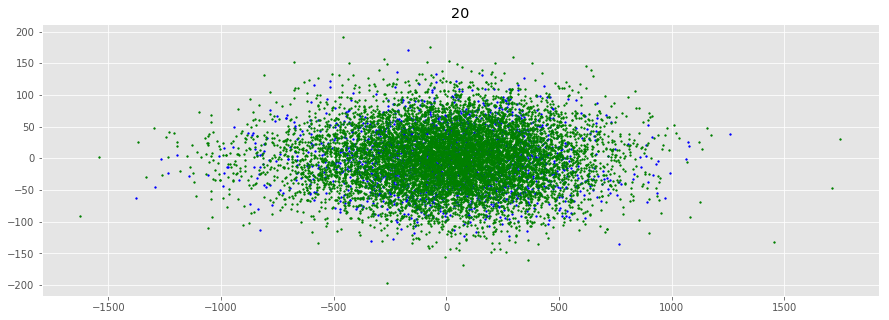

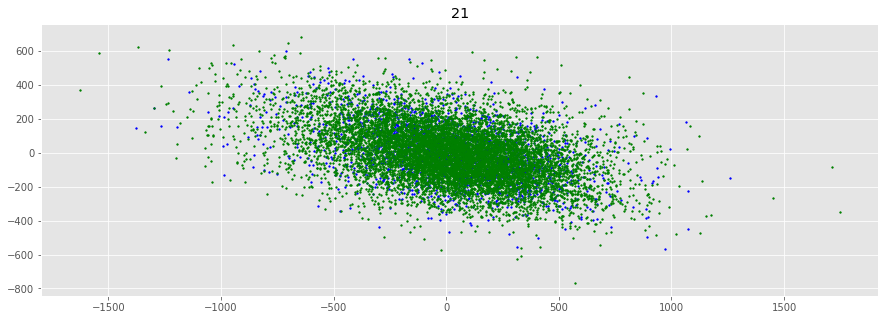

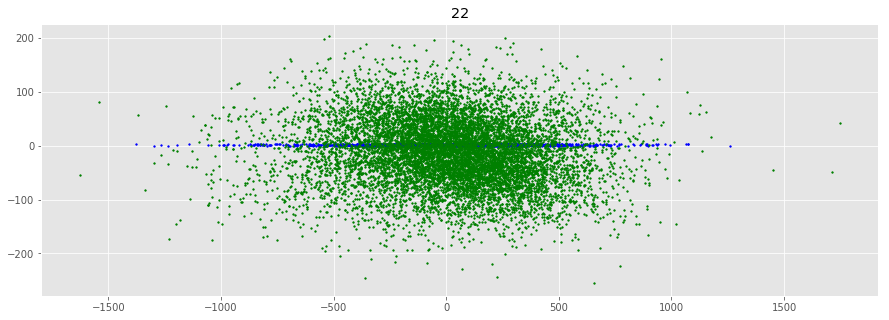

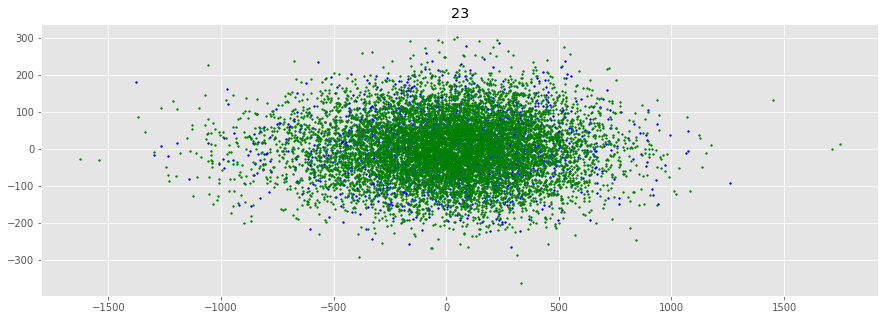

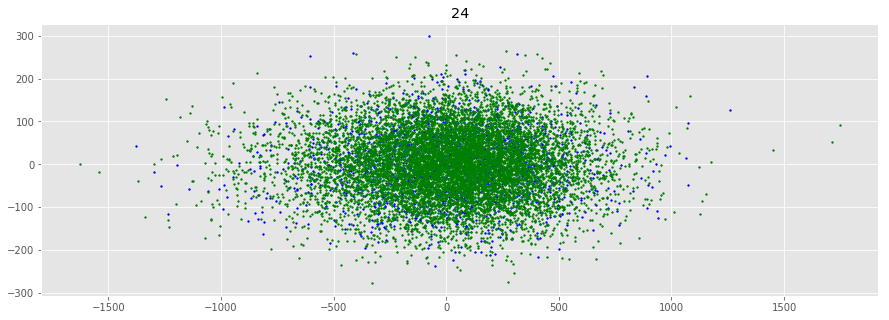

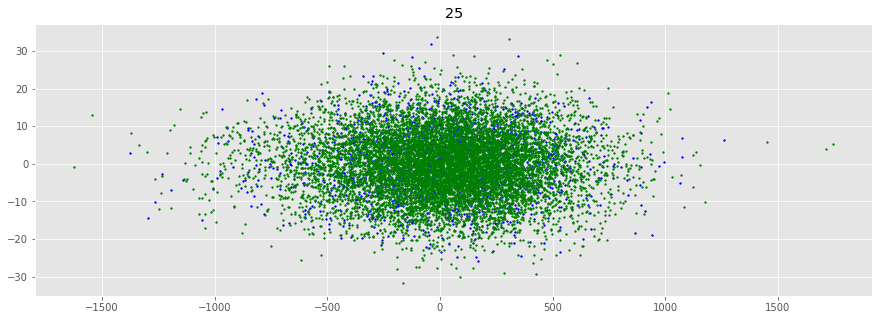

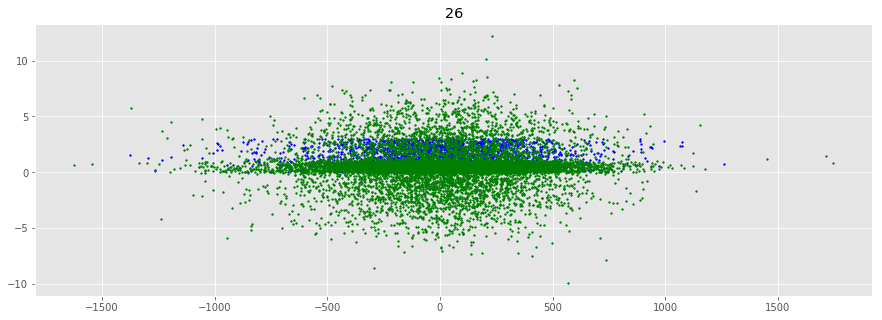

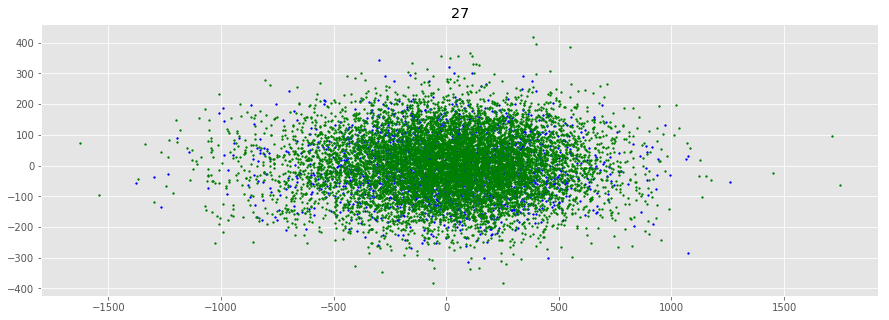

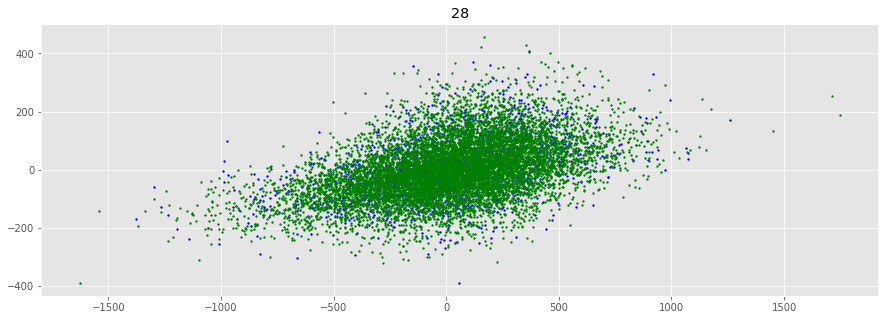

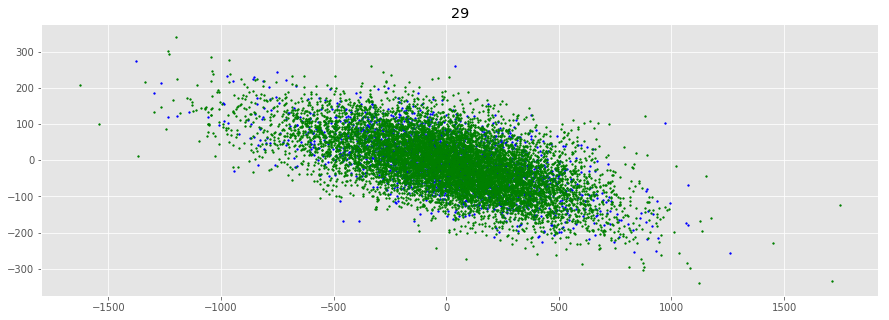

In [5]:
for i in range(30):
    plt.scatter(data_predict.to_numpy()[:,0], data_predict.to_numpy()[:,i], color='blue', s=3)
    plt.scatter(data.to_numpy()[:,0], data.to_numpy()[:,i], color='green', s=3)
    plt.title(i)
    plt.show()

In [6]:
drop_columns = [9,15,16,17, 22, 26]

data_predict.drop(columns = (drop_columns), inplace = True)
data.drop(columns = (drop_columns), inplace = True)

In [7]:
y = pd.read_csv("train-target.csv", names = ['answer'])
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size = 0.3, random_state = 30)

In [8]:
model =  RandomForestClassifier(n_estimators = 15)

rf_params = {'max_depth': 20, 'max_features': 20}
model.estimator_params = rf_params
model.n_estimators = 3000
model.fit(X_train, y_train.values.ravel())

result = []
for element in model.predict_proba(X_valid):
    result.append(element[1])  

In [9]:
roc_auc_score(y_valid, result)

0.8308307155896913

In [10]:
result = []
for element in model.predict_proba(data_predict):
    result.append(element[1]) 

np.savetxt("result.csv", result, delimiter=",")

